<a href="https://colab.research.google.com/github/JackyXu866/Project-in-ML-AI/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Research about Framework

1. I need to compare each framework to decide what to use. 
After reading, I decided to use Keras, because it is more simple 
and readable, and I dont have a large dataset for it to have 
a super fast performance.\
[SimpleLearn](https://www.simplilearn.com/keras-vs-tensorflow-vs-pytorch-article#:~:text=TensorFlow%20offers%20better%20visualization%2C%20which,to%20the%20TensorFlow%20Serving%20framework.)

2. I also need to learn how to import and process the data I imported.\
[Intro2Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/)

3. The model i am using to train\
[SequentialModel](https://keras.io/guides/sequential_model/)

4. Each specification of the layer\
[DenseLayer](https://keras.io/api/layers/core_layers/dense/)

# Task 2 - Implementation

## Import

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset
It is the dataset to recongnize the sign language represent the number.\
Although there are only 2062 samples, but it is image so I feel it is enough
to use the power of NN.
https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset?datasetId=7836

In [22]:
x = np.load('/content/X.npy')
y = np.load('/content/Y.npy')

## EDA

In [23]:
x.shape, y.shape

((2062, 64, 64), (2062, 10))

In [24]:
x[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [25]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
# the label is not the actual digit of hand
label_to_digit = {
    1: 0,
    4: 1,
    8: 2,
    7: 3,
    6: 4,
    9: 5,
    3: 6,
    2: 7,
    5: 8,
    0: 9,
}

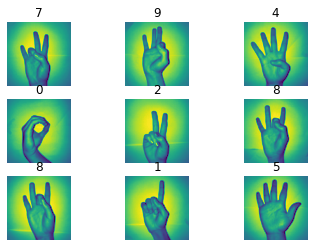

In [27]:
# image size is 64x64
size = 64 

# check out if labeling is correct
for i in range(9):
  choice = np.random.randint(0, x.shape[0])
  digit = int(np.nonzero(y[choice])[0])
  digit = label_to_digit[digit]
  plt.subplot(3, 3, i+1).set_title(digit)
  plt.imshow(x[choice].reshape(size, size))
  plt.axis('off')


Text(0.5, 1.0, 'Digit Distribution')

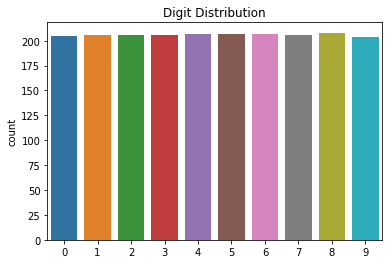

In [28]:
# check if all digits are balanced and change y to according number
num = [label_to_digit[int(np.nonzero(i)[0])] for i in y]
sns.countplot(x=num).set_title("Digit Distribution")

## Split

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = x_train.reshape(-1, 64, 64,1)
x_test = x_test.reshape(-1, 64, 64, 1)
x_train_flatten = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [30]:
x_train_flatten.T.shape, y_train.shape

((4096, 1649), (1649, 10))

## Forward Propagation
There are two layers in the NN. Both use the Relu activation with a random uniform weight initializer. There is also a l2 regularizer apply to the weight to prevent overfitting and underfitting. The first layer has 256 units, and the second layer has 128 units.\
There is also the output layer contains 10 units.

In [11]:
regualarizer = keras.regularizers.L2(0.01)
model = keras.Sequential([
  keras.layers.Dense(256, activation="relu", kernel_initializer="uniform", kernel_regularizer=regualarizer, input_dim = x_train_flatten.shape[1], name="layer1"),
  keras.layers.Dense(128, activation="relu", kernel_initializer="uniform", kernel_regularizer=regualarizer, name="layer2"),
  keras.layers.Dense(10, activation="sigmoid", name="output"),
])

## Gradient Descent & Opitmizer & Loss Function
Adam as optimizer\
categorical crossentropy as loss function

In [12]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

## Train

In [13]:
x_train_flatten.shape, y_train.shape

((1649, 4096), (1649, 10))

In [14]:
x_train_flatten[0]

array([0.56078434, 0.5647059 , 0.5647059 , ..., 0.4862745 , 0.48235294,
       0.47058824], dtype=float32)

In [15]:
history = model.fit(x_train_flatten, y_train, batch_size=32, epochs=100, validation_data=(x_test_flatten,y_test))

Epoch 1/100
52/52 [==============================] - 4s 47ms/step - loss: 6.5282 - accuracy: 0.1255 - mse: 0.3122 - val_loss: 3.7246 - val_accuracy: 0.1622 - val_mse: 0.2857
Epoch 2/100
52/52 [==============================] - 2s 39ms/step - loss: 3.0902 - accuracy: 0.1571 - mse: 0.2672 - val_loss: 2.6517 - val_accuracy: 0.1768 - val_mse: 0.2592
Epoch 3/100
52/52 [==============================] - 2s 29ms/step - loss: 2.4655 - accuracy: 0.2238 - mse: 0.2618 - val_loss: 2.3174 - val_accuracy: 0.2179 - val_mse: 0.2563
Epoch 4/100
52/52 [==============================] - 2s 34ms/step - loss: 2.1630 - accuracy: 0.2965 - mse: 0.2566 - val_loss: 2.1399 - val_accuracy: 0.3099 - val_mse: 0.2914
Epoch 5/100
52/52 [==============================] - 2s 41ms/step - loss: 1.9933 - accuracy: 0.3566 - mse: 0.2624 - val_loss: 1.8387 - val_accuracy: 0.4358 - val_mse: 0.2572
Epoch 6/100
52/52 [==============================] - 2s 32ms/step - loss: 1.8184 - accuracy: 0.4196 - mse: 0.2647 - val_loss: 1.70

In [16]:
y_pred = model.predict(x_test_flatten)
y_pred

array([[2.61178970e-01, 2.96684265e-01, 9.06715274e-01, ...,
        2.02655792e-04, 1.81296349e-01, 1.42842531e-04],
       [9.52000022e-01, 3.54482532e-02, 4.25380468e-03, ...,
        5.90255022e-01, 2.65416503e-03, 9.95793045e-01],
       [1.55225068e-01, 1.74125671e-01, 4.35041487e-02, ...,
        3.57808769e-01, 5.62766075e-01, 6.40058219e-02],
       ...,
       [1.15367055e-01, 6.99456871e-01, 8.49255562e-01, ...,
        2.94968486e-03, 2.64628649e-01, 9.48756933e-04],
       [8.27340841e-01, 1.71326816e-01, 5.46573997e-02, ...,
        2.25704610e-02, 7.20295012e-02, 8.26188028e-02],
       [2.26489156e-01, 9.33694601e-01, 8.38267565e-01, ...,
        1.08894378e-01, 1.96854413e-01, 2.93374062e-04]], dtype=float32)

In [17]:
# double verification of the accuracy for test set
correct = 0
for i in range(len(y_pred)):
  if(np.argmax(y_pred[i]) == np.argmax(y_test[i])):
    correct+=1
float(correct)/len(y_pred)

0.7966101694915254

## Graph Stats

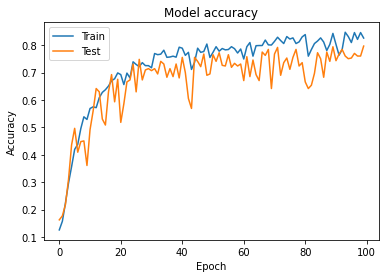

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

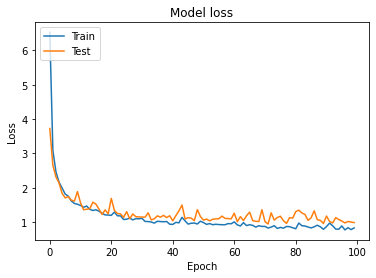

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

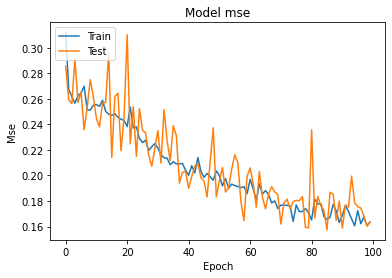

In [20]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse']) 
plt.title('Model mse') 
plt.ylabel('Mse') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Task 3 - Hyperparameter
First of all, I flatten the 64x64 image to a 1D array, so the
input shape has 4096 features, each representing a pixel of the 
picture. \
For the units count, I picked a relatively large number, 256/128.
I have tried with 8 and 4. However, the model does not converge
at all, and the accuracy stuck at 0.095 with this low unit count.\
For activation, I used "RELU" because it is the most advanced and 
best activation activation function right now. It is fast and has
no issue of Vanishing Gradient problem.\
I also used the uniform initializer for weight, because I remembered in
class that initialize the weight all zero is not a good idea.\
Regularizer is also used to prevent from overfitting or underfitting. The
one I am using is the L2 Regularizer, which the funtion is
```
loss = l2 * reduce_sum(square(x))
```

# Task 4 - Another model
I would use decision tree(random forest) for other baseline model.\
When it was default number of estimator, the model only takes 9 sec
but the accuracy is also as low as 0.414.
So I increase the number of estimator to 5000, it takes a huge amount
of time. In addition, the accuracy is lower, which might be caused by
overfitting.\
I feel like due to the complexity of this dataset, decision tree is unable
to handle it well. Because it is more like a simplified neural network. One
of the advantage of decision tree over neural network is that it is more
visualizable and easy to understand.

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=5000, random_state=42)
clf = clf.fit(x_train_flatten, y_train)

In [37]:
from sklearn.metrics import accuracy_score
# with 100 n_estimator
y_pred = clf.predict(x_test_flatten)
accuracy_score(y_test, y_pred)

0.41404358353510895

In [40]:
# with 5000 n_estimator
y_pred = clf.predict(x_test_flatten)
accuracy_score(y_test, y_pred)

0.39951573849878935